### 发现pyecharts兼容性比较差，Bokeh在数据格式上需要对其，因此主要以matplotlib为主，最后合二为一

In [123]:
import pandas as pd 
import numpy as py 
import datetime 
import matplotlib.pyplot as plt 
import sklearn as sk 
import scipy as sp 
import baostock as bs 
import seaborn as sns 

In [124]:
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
pd.options.display.float_format = '{:.2f}'.format

In [125]:
tables=pd.read_html("https://s.askci.com/stock/financialanalysis/003030",header=0)

In [126]:
df_year=tables[0]

In [127]:
df=tables[1]
df.head()

,类别\年份,销售毛利率 （%),营业利润率 （%),总资产利润率 （%),净资产收益率,存货周转率,应收账款周转率 （次),总资产周转率 （次)
0,2013,1.81,3.19,2.91,4.74%,9.09,9.77,0.91
1,2014,1.41,2.27,2.01,5.98%,9.65,10.76,0.89
2,2015,2.87,3.68,3.17,8.73%,10.69,12.16,0.86
3,2016,2.71,5.42,5.09,12.04%,12.34,--,0.94
4,2017,5.79,6.80,6.29,11.44%,11.16,8.69,0.92


In [128]:
df_asset=tables[2]
df_asset.head()

,类别\年份,资产负债率 （%),股东权益比率 （%),流动比率,速动比率
0,2013,70.57,29.43,0.63,0.50
1,2014,70.00,30.00,0.61,0.48
2,2015,68.96,31.04,0.57,0.49
3,2016,60.71,39.18,0.65,0.54
4,2017,60.02,40.09,0.88,0.70


In [129]:
df_cost=tables[3]
df_cost.head()

,类别\年份,营业成本 （元),销售费用 （元),管理费用 （元),财务费用 （元)
0,2013,7.60亿,1.58亿,7527.54万,2858.55万
1,2014,7.68亿,1.61亿,6470.15万,2725.30万
2,2015,7.78亿,1.65亿,5772.93万,2602.59万
3,2016,8.27亿,1.68亿,5280.43万,2045.20万
4,2017,8.13亿,1.62亿,5181.31万,1817.51万


In [130]:
#可以是季度级别也可以是年级别的
#df_year=df_year[df_year['类别\年份']>=2001]
df_year.head()

,类别\年份,营业收入 （元),营业利润 （元),利润总额 （元),净利润 （元),资产总计 （元),负债合计 （元),股东权益合计 （元)
0,2013,7.74亿,1399.23万,2465.55万,1167.70万,8.46亿,5.97亿,2.49亿
1,2014,7.79亿,1113.26万,1770.65万,1536.24万,8.80亿,6.16亿,2.64亿
2,2015,8.01亿,2302.96万,2949.49万,2412.85万,9.31亿,6.42亿,2.89亿
3,2016,8.50亿,2408.40万,4607.53万,3702.81万,9.06亿,5.50亿,3.55亿
4,2017,8.63亿,5935.59万,5867.60万,4148.87万,9.33亿,5.60亿,3.74亿


In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 

In [132]:
df_year.columns

Index(['类别\年份', '营业收入 （元)', '营业利润 （元)', '利润总额 （元)', '净利润 （元)', '资产总计 （元)',
       '负债合计 （元)', '股东权益合计 （元)'],
      dtype='object')

In [133]:
def convert_unit(value):
    """带单位字符串转浮点数（统一转换为亿元单位）"""
    if pd.isna(value) or value == "":
        return 0.0  # 处理空值
    if '亿' in value:
        return float(value.replace('亿', ''))
    elif '万' in value:
        return float(value.replace('万', '')) / 10000
    else:
        return float(value)

# 应用转换函数到数值列
numeric_cols = ['营业收入 （元)', '营业利润 （元)']
for col in numeric_cols:
    df_year[col] = df_year[col].apply(convert_unit)


In [134]:
df_year

,类别\年份,营业收入 （元),营业利润 （元),利润总额 （元),净利润 （元),资产总计 （元),负债合计 （元),股东权益合计 （元)
0,2013,7.74,0.14,2465.55万,1167.70万,8.46亿,5.97亿,2.49亿
1,2014,7.79,0.11,1770.65万,1536.24万,8.80亿,6.16亿,2.64亿
2,2015,8.01,0.23,2949.49万,2412.85万,9.31亿,6.42亿,2.89亿
3,2016,8.50,0.24,4607.53万,3702.81万,9.06亿,5.50亿,3.55亿
4,2017,8.63,0.59,5867.60万,4148.87万,9.33亿,5.60亿,3.74亿
5,2018,9.39,0.86,8460.43万,6394.18万,10.18亿,5.95亿,4.23亿
6,2019,10.48,1.21,1.19亿,9016.51万,10.23亿,5.19亿,5.04亿
7,2020,12.25,1.35,1.33亿,1.01亿,15.79亿,5.87亿,9.92亿
8,2021,13.37,0.72,6976.06万,5572.00万,16.93亿,6.77亿,10.16亿
9,2022,14.87,0.48,4812.53万,3788.27万,17.50亿,7.13亿,10.37亿


In [135]:
df_year.columns

Index(['类别\年份', '营业收入 （元)', '营业利润 （元)', '利润总额 （元)', '净利润 （元)', '资产总计 （元)',
       '负债合计 （元)', '股东权益合计 （元)'],
      dtype='object')

In [136]:
df_year = pd.DataFrame(df_year)
#df_year.set_index('类别\年份', inplace=True)
# 计算环比增长率（复用之前的代码逻辑）
df_year['营收环比增长'] = df_year['营业收入 （元)'].pct_change().mul(100)
df_year['利润环比增长'] = df_year['营业利润 （元)'].pct_change().mul(100)

In [137]:
df_year.columns

Index(['类别\年份', '营业收入 （元)', '营业利润 （元)', '利润总额 （元)', '净利润 （元)', '资产总计 （元)',
       '负债合计 （元)', '股东权益合计 （元)', '营收环比增长', '利润环比增长'],
      dtype='object')

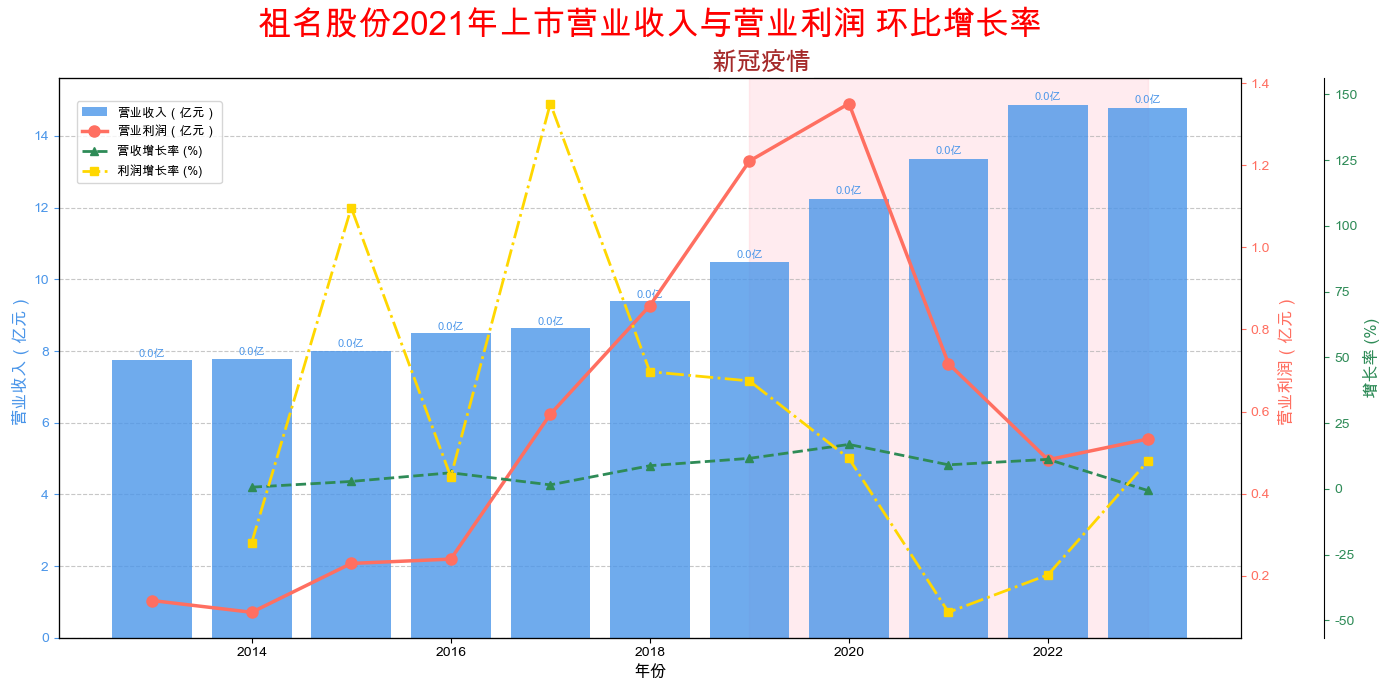

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
pd.options.display.float_format = '{:.2f}'.format


# 创建画布
fig, ax1 = plt.subplots(figsize=(14, 7))

# 营业收入柱状图
bars = ax1.bar(df_year['类别\年份'], df_year['营业收入 （元)'], color='#4B96E9', alpha=0.8, label='营业收入（亿元）')
ax1.set_ylabel('营业收入（亿元）', fontsize=12, color='#4B96E9')
ax1.tick_params(axis='y', colors='#4B96E9')

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height*1.005,
             f'{height/10000:.1f}亿',
             ha='center', va='bottom', color='#4B96E9', fontsize=8)

# 创建双坐标轴
ax2 = ax1.twinx()

# 营业利润折线
line1, = ax2.plot(df_year['类别\年份'],df_year['营业利润 （元)'], color='#FF6F61', marker='o', 
                 linewidth=2.5, markersize=8, label='营业利润（亿元）')

# 增长率折线
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
line2, = ax3.plot(df_year['类别\年份'], df_year['营收环比增长'], color='#2E8B57', linestyle='--', marker='^',
                 linewidth=2, markersize=6, label='营收增长率 (%)')
line3, = ax3.plot(df_year['类别\年份'], df_year['利润环比增长'], color='#FFD700', linestyle='-.', marker='s',
                 linewidth=2, markersize=6, label='利润增长率 (%)')

# 设置坐标轴
ax2.set_ylabel('营业利润（亿元）', fontsize=12, color='#FF6F61')
ax3.set_ylabel('增长率 (%)', fontsize=12, color='#2E8B57')
ax2.tick_params(axis='y', colors='#FF6F61')
ax3.tick_params(axis='y', colors='#2E8B57')

# 装饰元素
plt.title("祖名股份2021年上市营业收入与营业利润 环比增长率\n", fontsize=24, fontweight='bold', color='red')
ax1.set_xlabel('年份', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)

# 合并图例
lines = [bars, line1, line2, line3]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.01, 0.97),
          frameon=True, fontsize=9)

# 高亮特殊年份
#ax1.axvspan(2008, 2009, color='pink', alpha=0.3, zorder=0)
#ax1.text(2008.5, ax1.get_ylim()*1.1, '金融危机', ha='center', va='top', color='#B22222', fontsize=9)
#ax1.text(x=2008.5, y=1.005, s='金融危机',transform=ax1.get_xaxis_transform(), ha='center',  va='bottom',color='#B22222', fontsize=18,bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框)

ax1.axvspan(2019, 2023, color='pink', alpha=0.3, zorder=0)
#ax1.text(2019.5, ax1.get_ylim()*1.1, '疫情时期', ha='center', va='top', color='#228B22', fontsize=9)
ax1.text(
    x=2019.12, 
    y=1.005,  # y轴顶部上方5%的位置
    s='新冠疫情',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='brown', 
    fontsize=18,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)


#plt.xlim(1999.5, 2023.5)
fig.tight_layout()
plt.show()


### 京东方A再融资表演专用

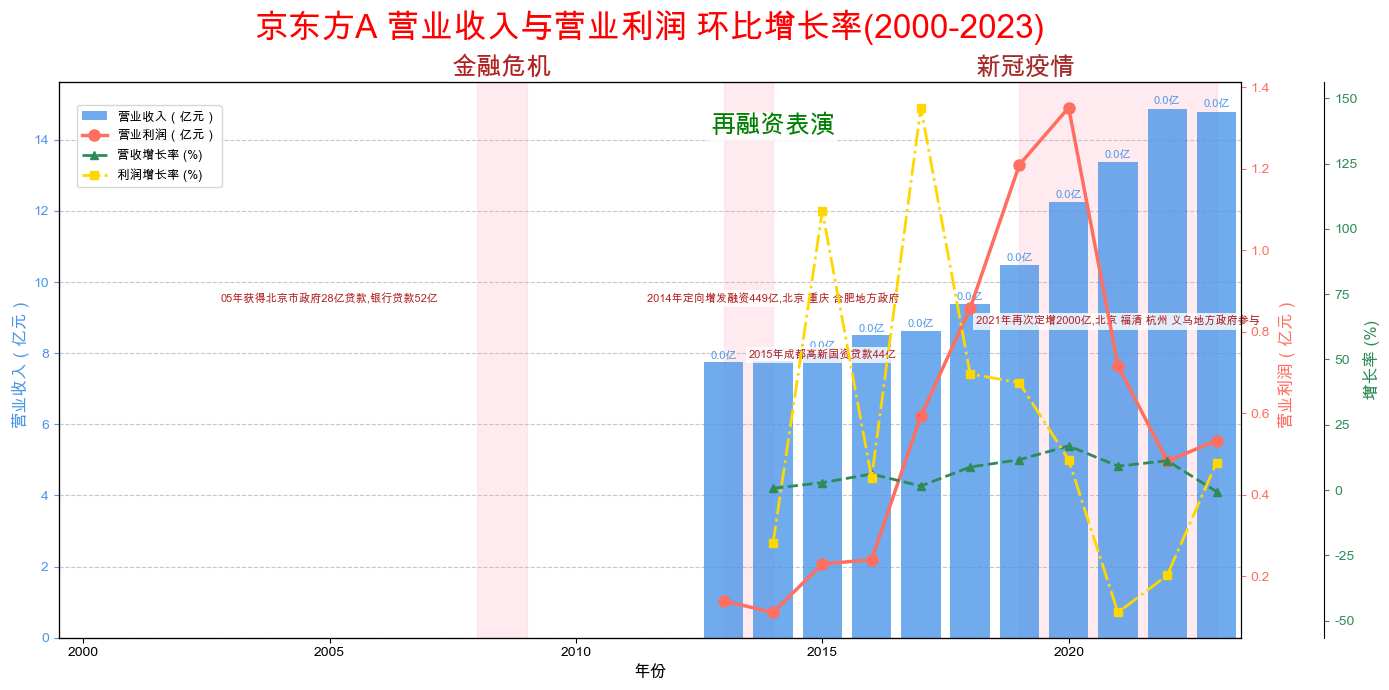

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
pd.options.display.float_format = '{:.2f}'.format


# 创建画布
fig, ax1 = plt.subplots(figsize=(14, 7))

# 营业收入柱状图
bars = ax1.bar(df_year['类别\年份'], df_year['营业收入 （元)'], color='#4B96E9', alpha=0.8, label='营业收入（亿元）')
ax1.set_ylabel('营业收入（亿元）', fontsize=12, color='#4B96E9')
ax1.tick_params(axis='y', colors='#4B96E9')

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height*1.005,
             f'{height/10000:.1f}亿',
             ha='center', va='bottom', color='#4B96E9', fontsize=8)

# 创建双坐标轴
ax2 = ax1.twinx()

# 营业利润折线
line1, = ax2.plot(df_year['类别\年份'],df_year['营业利润 （元)'], color='#FF6F61', marker='o', 
                 linewidth=2.5, markersize=8, label='营业利润（亿元）')

# 增长率折线
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
line2, = ax3.plot(df_year['类别\年份'], df_year['营收环比增长'], color='#2E8B57', linestyle='--', marker='^',
                 linewidth=2, markersize=6, label='营收增长率 (%)')
line3, = ax3.plot(df_year['类别\年份'], df_year['利润环比增长'], color='#FFD700', linestyle='-.', marker='s',
                 linewidth=2, markersize=6, label='利润增长率 (%)')

# 设置坐标轴
ax2.set_ylabel('营业利润（亿元）', fontsize=12, color='#FF6F61')
ax3.set_ylabel('增长率 (%)', fontsize=12, color='#2E8B57')
ax2.tick_params(axis='y', colors='#FF6F61')
ax3.tick_params(axis='y', colors='#2E8B57')

# 装饰元素
plt.title("京东方A 营业收入与营业利润 环比增长率(2000-2023)\n", fontsize=24, fontweight='bold', color='red')
ax1.set_xlabel('年份', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)

# 合并图例
lines = [bars, line1, line2, line3]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.01, 0.97),
          frameon=True, fontsize=9)

# 高亮特殊年份
ax1.axvspan(2008, 2009, color='pink', alpha=0.3, zorder=0)
#ax1.text(2008.5, ax1.get_ylim()*1.1, '金融危机', ha='center', va='top', color='#B22222', fontsize=9)
ax1.text(
    x=2008.5, 
    y=1.005,  # y轴顶部上方5%的位置
    s='金融危机',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='#B22222', 
    fontsize=18,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

ax1.axvspan(2019, 2023, color='pink', alpha=0.3, zorder=0)
#ax1.text(2019.5, ax1.get_ylim()*1.1, '疫情时期', ha='center', va='top', color='#228B22', fontsize=9)
ax1.text(
    x=2019.12, 
    y=1.005,  # y轴顶部上方5%的位置
    s='新冠疫情',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='brown', 
    fontsize=18,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

# 高亮特殊年份
ax1.axvspan(2013, 2014, color='pink', alpha=0.3, zorder=0)
ax1.text(
    x=2014, 
    y=0.9,  # y轴顶部上方5%的位置
    s='再融资表演',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='green', 
    fontsize=18,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

# 调整布局
ax1.text(
    x=2005, 
    y=0.6,  # y轴顶部上方5%的位置
    s='05年获得北京市政府28亿贷款,银行贷款52亿',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='#B22222', 
    fontsize=8,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

ax1.text(
    x=2014, 
    y=0.6,  # y轴顶部上方5%的位置
    s='2014年定向增发融资449亿,北京 重庆 合肥地方政府',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='#B22222', 
    fontsize=8,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

ax1.text(
    x=2015, 
    y=0.5,  # y轴顶部上方5%的位置
    s='2015年成都高新国资贷款44亿',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='#B22222', 
    fontsize=8,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)

ax1.text(
    x=2021, 
    y=0.56,  # y轴顶部上方5%的位置
    s='2021年再次定增2000亿,北京 福清 杭州 义乌地方政府参与',
    transform=ax1.get_xaxis_transform(),  # 关键：混合坐标系
    ha='center', 
    va='bottom',
    color='#B22222', 
    fontsize=8,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)  # 添加白色背景框
)




plt.xlim(1999.5, 2023.5)
fig.tight_layout()
plt.show()


In [109]:
df_cost=tables[3]
df_cost

,类别\年份,营业成本 （元),销售费用 （元),管理费用 （元),财务费用 （元)
0,1994,1.34亿,290.00万,2281.80万,1070.20万
1,1995,1.81亿,366.90万,4057.00万,1098.10万
2,1996,1.80亿,408.20万,3447.50万,1532.60万
3,1997,2.09亿,407.90万,2663.40万,-941.10万
4,1998,2.13亿,517.50万,3072.78万,-418.37万
5,1999,6.98亿,1234.11万,7167.45万,1329.83万
6,2000,21.56亿,6535.60万,8789.43万,2594.93万
7,2001,25.49亿,7296.64万,1.07亿,2052.95万
8,2002,46.45亿,1.60亿,2.73亿,6554.23万
9,2003,107.92亿,2.88亿,7.93亿,2.62亿


In [110]:
df_cost.columns

Index(['类别\年份', '营业成本 （元)', '销售费用 （元)', '管理费用 （元)', '财务费用 （元)'], dtype='object')

In [111]:
def convert_unit(value):
    """带单位字符串转浮点数（统一转换为亿元单位）"""
    if pd.isna(value) or value == "":
        return 0.0  # 处理空值
    if '亿' in value:
        return float(value.replace('亿', ''))
    elif '万' in value:
        return float(value.replace('万', '')) / 10000
    else:
        return float(value)

# 应用转换函数到数值列
numeric_cols = ['营业成本 （元)', '销售费用 （元)','管理费用 （元)','财务费用 （元)']
for col in numeric_cols:
    df_cost[col] = df_cost[col].apply(convert_unit)


In [114]:
df_cost.columns

Index(['类别\年份', '营业成本 （元)', '销售费用 （元)', '管理费用 （元)', '财务费用 （元)'], dtype='object')

In [122]:
# 启用交互模式（Jupyter需执行此行）
%matplotlib widget

RuntimeError: 'widget is not a recognised GUI loop or backend name

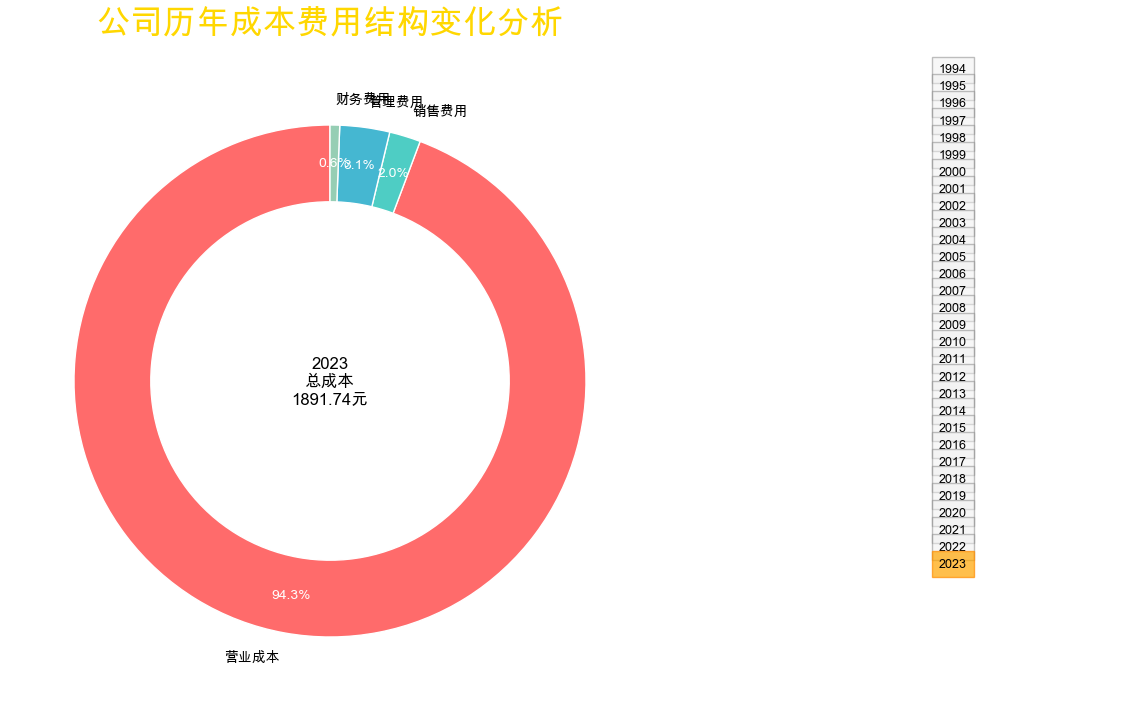

In [121]:
from matplotlib import animation
from matplotlib.widgets import Button
df = pd.DataFrame(df_cost)

# 设置可视化参数
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
categories = ['营业成本', '销售费用', '管理费用', '财务费用']

# 创建画布和主图表区域
fig = plt.figure(figsize=(14, 8))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # 主图表区域
plt.subplots_adjust(right=0.7)  # 右侧留白

# 创建年份选择面板
year_panel = fig.add_axes([0.72, 0.1, 0.25, 0.8])  # 年份选择面板
year_panel.axis('off')

# 生成年份按钮
years = df['类别\年份'].tolist()
button_height = 0.8 / len(years)  # 动态计算按钮高度
buttons = []

for idx, year in enumerate(years):
    btn = year_panel.text(
        0.5, 1 - (idx+0.5)*button_height,  # 垂直居中排列
        str(year),
        ha='center', va='center',
        fontsize=9,
        bbox=dict(facecolor='#F0F0F0', edgecolor='gray', alpha=0.5, pad=5),
        picker=True  # 启用拾取功能
    )
    buttons.append(btn)

# 初始化环形饼图
def create_donut(year):
    ax.clear()
    data = df[df['类别\年份'] == year].iloc[:, 1:].values.flatten()
    total = data.sum()
    percentages = data / total * 100
    
    # 绘制环形饼图
    wedges, texts, autotexts = ax.pie(
        percentages,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        labels=categories,
        colors=colors,
        autopct='%.1f%%',
        pctdistance=0.85,
        startangle=90
    )
    
    # 设置中心文字
    ax.text(0, 0, f"{year}\n总成本\n{total:.2f}元", 
            ha='center', va='center', fontsize=12)
    
    # 样式优化
    plt.setp(autotexts, size=10, weight='bold', color='white')
    plt.setp(texts, size=10)
    ax.set_title(f'公司历年成本费用结构变化分析', fontweight='bold',fontsize=24, pad=20,color='gold')
    
# 交互逻辑
current_year = 2023  # 初始显示年份
highlight_box = dict(facecolor='#FFA500', edgecolor='darkorange', alpha=0.7, pad=5)

def on_pick(event):
    global current_year
    if event.artist in buttons:
        # 清除旧的高亮效果
        for btn in buttons:
            btn.set_bbox(dict(facecolor='#F0F0F0', edgecolor='gray', alpha=0.5, pad=5))
        
        # 设置新选择年份的高亮
        selected_year = int(event.artist.get_text())
        event.artist.set_bbox(highlight_box)
        
        # 更新主图表
        if selected_year != current_year:
            current_year = selected_year
            create_donut(selected_year)
            fig.canvas.draw()

# 绑定事件
fig.canvas.mpl_connect('pick_event', on_pick)

# 初始显示
create_donut(current_year)
buttons[-1].set_bbox(highlight_box)  # 高亮初始年份

plt.show()
